# [Project 1] 구글 스토어 앱 데이터 분석을 통한 평점 예측

---

## 프로젝트 목표
- 구글 스토어 앱 데이터 분석을 통하여 앱 평점을 예측하는 회귀 모델 수행
- 구글 스토어 앱 평점에 영향을 미치는 특성 데이터들에 대한 데이터 분석 수행

---

## 프로젝트 목차
1. **데이터 읽기:** 구글 스토어 앱 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화 & 추가 데이터 정제:** 변수 시각화를 통하여 분포 파악 및 추가 데이터 정제

4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

5. **모델 학습 및 평가:** 회귀 모델을 사용하여 학습 수행, 평가 및 예측 수행

---

## 데이터 출처
-  https://www.kaggle.com/gauthamp10/google-playstore-apps

---

## 프로젝트 개요

처음 사용하는 애플리케이션을 받기 전에는 평점과 리뷰 정보를 보고 이 앱이 좋은지 안 좋은지를 판단하곤 합니다. 만약 출시되지 않은 애플리케이션의 경우, 구글 스토어의 정보만을 가지고 평점을 예측할 방법이 있다면 다운로드 받기 전 도움이 되지 않을까요?

이번 프로젝트에서는 구글 스토어에서 제공하는 데이터를 바탕으로 탐색적 데이터 분석을 수행하고 평점을 예측하는 회귀 모델을 구현합니다. 데이터 분석 및 회귀 모델을 바탕으로 새로운 애플리케이션이 나왔을 때, 평점을 예측할 수 있으며, 어떠한 특성 데이터가 평점을 예측하는 데 큰 영향을 미쳤는지 또한 알 수 있습니다.

---

## 1. 데이터 읽기

### 1.1 라이브러리 불러오기

이번 실습에서 필요한 라이브러리를 불러옵니다.

In [1]:
# !pip uninstall -y pandas
# !pip install pandas==1.3.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 1.2 Google Play Store 데이터셋 불러오기

pandas를 사용하여 `/mnt/data/Google-Playstore.csv` 데이터를 읽고 dataframe 형태로 저장해 봅시다.

In [2]:
# Google-Playstore.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv('./data/Google-Playstore.csv')

### 1.3 데이터 훑어보기

In [3]:
# 5개의 데이터 샘플을 출력합니다.
df_origin.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,0,foodpanda - Local Food & Grocery Delivery,com.global.foodpanda.android,Food & Drink,4.4,1258493.0,"10,000,000+",10000000.0,48828081,True,...,Foodpanda GmbH a subsidiary of Delivery Hero SE,http://foodpanda.com,appsupport@foodpanda.com,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,https://www.foodpanda.sg/contents/privacy.htm,False,False,False
1,1,"Tripadvisor Hotel, Flight & Restaurant Bookings",com.tripadvisor.tripadvisor,Travel & Local,4.4,1360172.0,"100,000,000+",100000000.0,371284181,True,...,Tripadvisor,https://www.tripadvisor.com/help,mobilehelp@tripadvisor.com,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,https://www.tripadvisor.com/pages/privacy.html,True,False,False
2,2,Safeway Delivery & Pick Up,com.safeway.shop,Shopping,4.2,5532.0,"500,000+",500000.0,816102,True,...,"Albertsons Companies, Inc.",http://www.safeway.com,homeshopping@customerservice.safeway.com,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,http://www.safeway.com/ShopStores/Privacy-Poli...,False,False,False
3,3,My CookBook Ad-Free,fr.cookbookpro,Food & Drink,4.7,2531.0,"10,000+",10000.0,16171,False,...,Maadinfo Services,https://www.mycookbook-online.net,support@mycookbook-online.net,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,https://www.mycookbook-android.com/site/privac...,False,False,False
4,4,Talabat: Food & Grocery Delivery,com.talabat,Food & Drink,4.4,197649.0,"5,000,000+",5000000.0,9218590,True,...,Talabat,http://www.talabat.com,info@talabat.com,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,https://www.talabat.com/kuwait/privacy,True,False,False


In [4]:
# dataframe의 정보를 요약해서 출력합니다.
df_origin.info()
# row 개수와 Non-Null Count가 다른 변수들이 있음 => 비어있음 => 나중에 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603047 entries, 0 to 603046
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         603047 non-null  int64  
 1   App Name           603046 non-null  object 
 2   App Id             603047 non-null  object 
 3   Category           603047 non-null  object 
 4   Rating             599287 non-null  float64
 5   Rating Count       599287 non-null  float64
 6   Installs           602875 non-null  object 
 7   Minimum Installs   602875 non-null  float64
 8   Maximum Installs   603047 non-null  int64  
 9   Free               603047 non-null  bool   
 10  Price              603047 non-null  float64
 11  Currency           602866 non-null  object 
 12  Size               603047 non-null  object 
 13  Minimum Android    602556 non-null  object 
 14  Developer Id       603045 non-null  object 
 15  Developer Website  423783 non-null  object 
 16  De

In [5]:
# 수치형 변수의 통계량 정보를 출력합니다.
df_origin.describe() # => float 타입의 데이터들만 통계량을 구할 수 있습니다.

,Unnamed: 0,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,603047.00000,599287.000000,5.992870e+05,6.028750e+05,6.030470e+05,603047.000000
mean,301523.00000,2.995484,8.627273e+03,4.997939e+05,8.566150e+05,0.248818
std,174084.81823,1.911436,3.467317e+05,2.523102e+07,3.755474e+07,3.392709
min,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,150761.50000,0.000000,0.000000e+00,1.000000e+02,4.680000e+02,0.000000
50%,301523.00000,4.000000,2.900000e+01,5.000000e+03,5.034000e+03,0.000000
75%,452284.50000,4.400000,2.560000e+02,1.000000e+04,4.346500e+04,0.000000
max,603046.00000,5.000000,1.170193e+08,5.000000e+09,9.975727e+09,400.000000


## 2. 데이터 정제

데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)** 를 처리합니다.

일반적으로는 각 변수에 대해서 자세히 살펴보면서 결측값과 이상치를 제거를 수행합니다.

이번 파트에서는 간단한 결측값 처리 방식인 삭제 방식을 수행해 보고 다음 과정에서 이어서 데이터 정제를 수행해보겠습니다.

### 2.1. 변수 삭제

이번 실습에서는 23개의 변수 중 본 실습에서는 간결함을 위해 12개의 `App Name`, `App Id`, `Developer Id`, `Developer Website`, `Developer Email`, `Currency`, `Size`, `Released`, `Privacy Policy`, `Price`, `Minimum Installs`, `Maximum Installs` 을 삭제하여 진행합니다.

나머지 11개의 변수들은 이후 실습시간에 모두 사용하여 모델링을 하도록 합니다

In [6]:
# drop 함수를 사용하여 변수들을 삭제합니다.
df_clean = df_origin.drop(
    columns=[
        'App Name', 'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Currency', 'Size',
        'Released', 'Privacy Policy','Price', 'Minimum Installs', 'Minimum Android', 'Maximum Installs'
    ],
    axis=1
)
df_clean

,Unnamed: 0,Category,Rating,Rating Count,Installs,Free,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,0,Food & Drink,4.4,1258493.0,"10,000,000+",True,2020-07-07 00:14:05,Everyone,False,False,False
1,1,Travel & Local,4.4,1360172.0,"100,000,000+",True,2020-07-02 20:10:48,Everyone,True,False,False
2,2,Shopping,4.2,5532.0,"500,000+",True,2020-07-16 23:21:50,Everyone,False,False,False
3,3,Food & Drink,4.7,2531.0,"10,000+",False,2020-07-07 12:41:28,Everyone,False,False,False
4,4,Food & Drink,4.4,197649.0,"5,000,000+",True,2020-07-15 19:21:16,Mature 17+,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
603042,603042,Health & Fitness,0.0,0.0,100+,True,2019-11-11 21:45:10,Everyone,False,False,False
603043,603043,Health & Fitness,0.0,0.0,5+,True,2020-03-03 01:02:21,Everyone,False,False,False
603044,603044,Health & Fitness,0.0,0.0,50+,True,2019-11-26 04:20:49,Everyone,False,False,False
603045,603045,Health & Fitness,0.0,0.0,10+,True,2019-11-26 01:23:35,Everyone,False,False,False


### 2.2. 결측값 확인

아래 코드를 수행하여 각 변수별로 결측값이 몇개가 있는지 확인합니다.

---



In [7]:
# 결측값 정보를 출력합니다.
df_clean.isnull().sum()

Unnamed: 0             0
Category               0
Rating              3760
Rating Count        3760
Installs             172
Free                   0
Last Updated           0
Content Rating         0
Ad Supported           0
In App Purchases       0
Editors Choice         0
dtype: int64

확인해보니 `Rating` 변수와 `Rating Count` 변수의 결측치 개수가 같습니다.

과연 `Rating`이 결측치인 row는 `Rating Count`도 결측치인지 확인해보겠습니다.

In [10]:
# 'Rating'이 결측치인 row만 filter
rating_null = df_clean[df_clean['Rating'].isnull()]

# `Rating`이 결측치인 경우 `Rating Count` 변수는 어떤 값을 가지는지 확인
rating_null['Rating Count'].unique()

array([nan])

`Rating`이 결측치인 row 중 `Rating Count`의 값은 `NaN` 뿐인 것을 확인했습니다.

따라서 `Rating`이 결측치인 row와 `Rating Count`이 결측치인 row는 일치하는 것을 확인할 수 있습니다.

### 2.3. 결측값 처리

In [11]:
# dropna를 사용하여 결측값이 있는 샘플들을 삭제합니다.
df_clean = df_clean.dropna(axis=0)

In [12]:
# 결측값을 정보를 출력합니다.
df_clean.isnull().sum() #=>개수확인

Unnamed: 0          0
Category            0
Rating              0
Rating Count        0
Installs            0
Free                0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## 3. 데이터 시각화 & 추가 데이터 정제

각 변수 분포를 알아보기 위하여 시각화를 수행하겠습니다.

시각화를 통해서 변수 내에 결측값 또는 이상치 처리가 필요하다 생각되면 이를 수행하고 또한 변수의 문자형 데이터를 숫자형 데이터로 변환하는 **특성 엔지니어링(Feature engineering)** 또한 수행해보겠습니다.

### 3.1. `Rating` & `Rating Count` 시각화

각 앱의 리뷰 평점을 의미하는 `Rating` 변수와 리뷰 개수를 의미하는 `Rating Count`를 시각화 해봅니다.

<Axes: xlabel='Rating'>

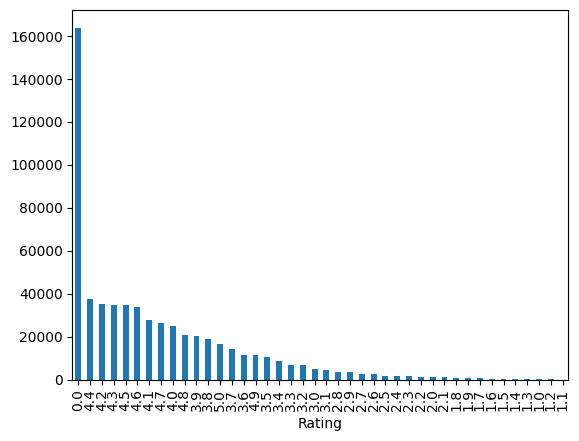

In [13]:
# Rating 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Rating'].value_counts().plot(kind='bar')

In [14]:
# Rating 값이 0인 데이터의 개수를 출력합니다.
len(df_clean[df_clean['Rating'] == 0])

163968

In [15]:
# Rating Count 값이 0인 데이터의 개수를 출력합니다.
len(df_clean[df_clean['Rating Count'] == 0])

163968

리뷰가 하나도 없는 경우 `Rating` 값을 0으로 설정하는 것을 확인하였습니다.

리뷰가 너무 적은 경우에도 평점이 대표성을 띈다고 보기 어렵기 때문에 리뷰 개수가 10개 이하인 row는 제거하도록 하겠습니다.

In [16]:
# 'Rating Count' 값이 10보다 큰 경우 부터 의미 있는 데이터로 생각하고 10보다 작은 데이터는 삭제합니다.
df_clean = df_clean[df_clean['Rating Count'] > 10]

<Axes: xlabel='Rating'>

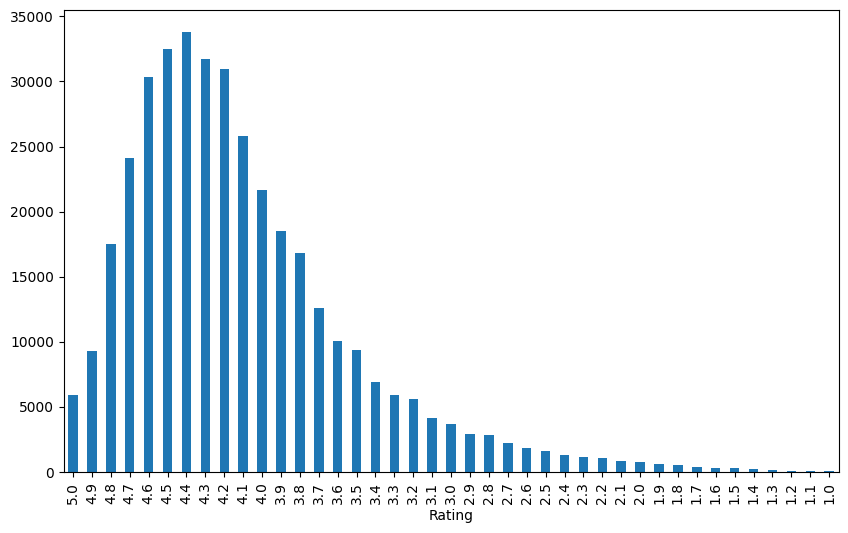

In [17]:
# 그래프 사이즈 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 추가 정제한 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Rating'].value_counts().sort_index(ascending=False).plot(kind='bar')

`Rating Count`를 10개 단위로 나누어서 확인해봅니다.

C:\Users\3balb\AppData\Local\Temp\ipykernel_10380\202811566.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


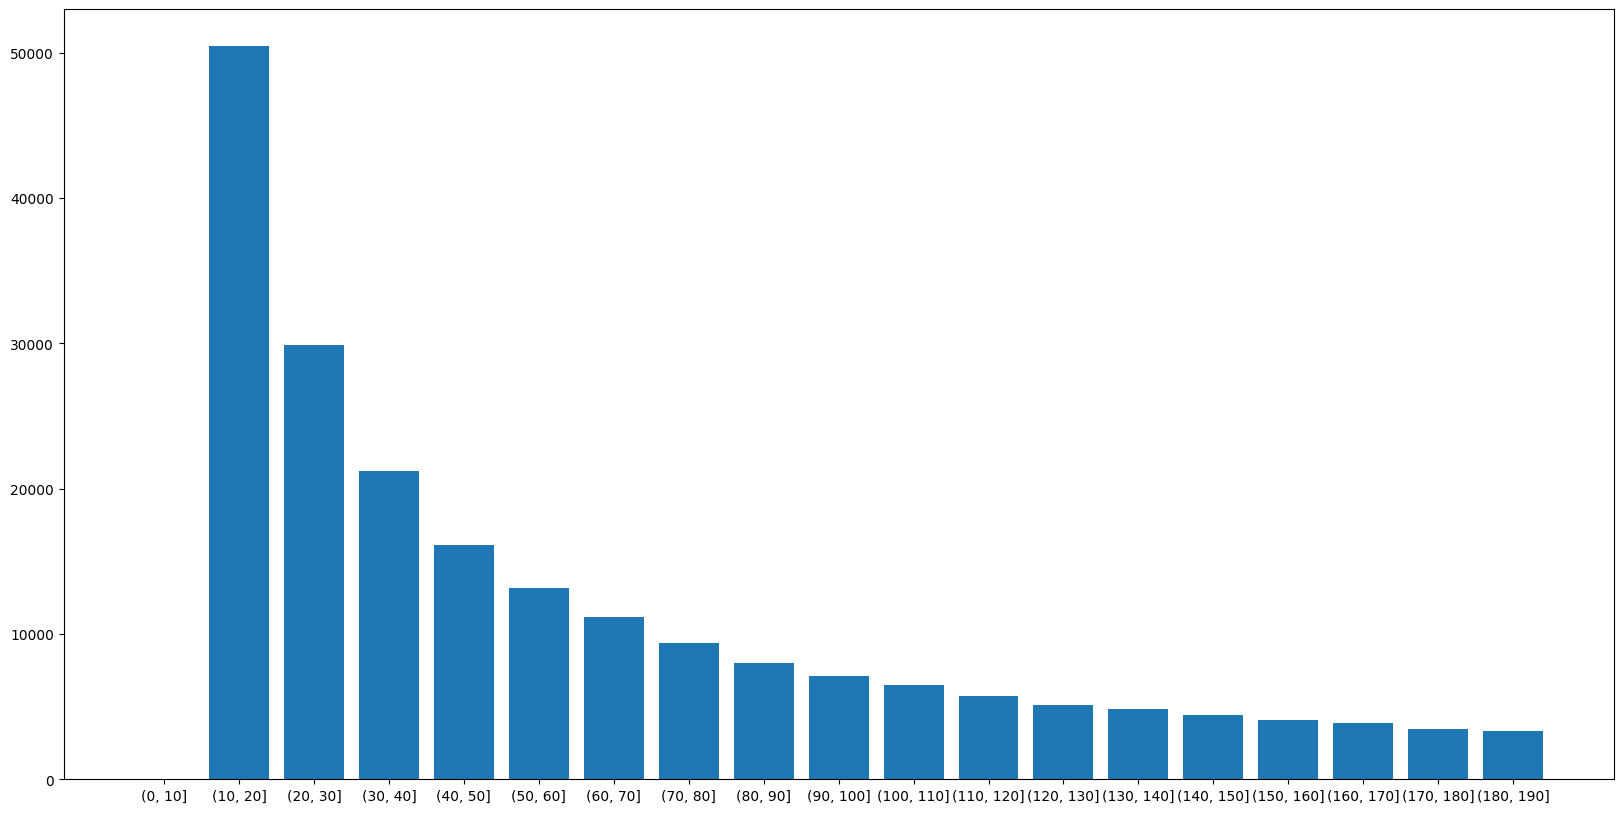

In [18]:
# Rating Count를 10 단위로 분리하기 위해서 pd.cut을 사용합니다.
df_cut_rating = pd.cut(df_clean['Rating Count'], np.arange(0, 200, 10)).value_counts(sort=False)

# 히스토그램 출력
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(range(len(df_cut_rating)), df_cut_rating.values)

# x축 표기를 위한 세팅
ax.set_xticks(range(len(df_cut_rating)))
ax.set_xticklabels(df_cut_rating.index)
fig.show()

### 3.2. `Installs` 시각화

각 앱의 설치 횟수를 보여주는 `Installs` 변수를 시각화 해봅니다.

<Axes: xlabel='Installs'>

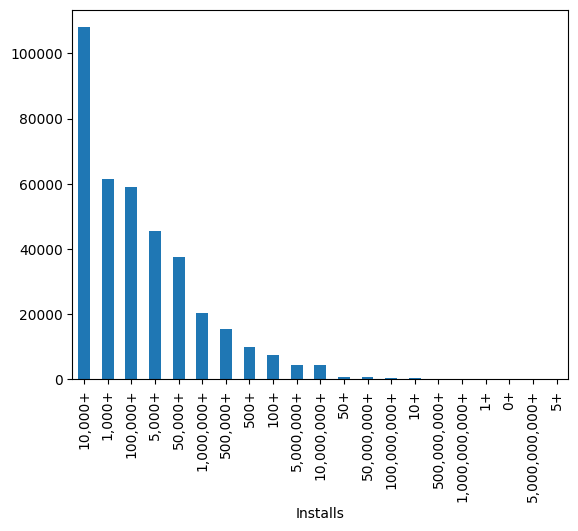

In [19]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Installs'].value_counts().plot(kind='bar')

In [20]:
# 문자열 데이터를 수치 자료형으로 변환합니다.
# + 삭제, 쉼표 삭제, int형 변화
for element in set(df_clean['Installs']):
    # 먼저 + 앞쪽의 숫자를 가져온 다음에
    # 1000단위 구분 쉼표를 제거합니다.
    # 그런 이후 숫자를 정수형으로 저장합니다.
    df_clean = df_clean.replace(element, int(element.split('+')[0].replace(',', '')))

<Axes: xlabel='Installs'>

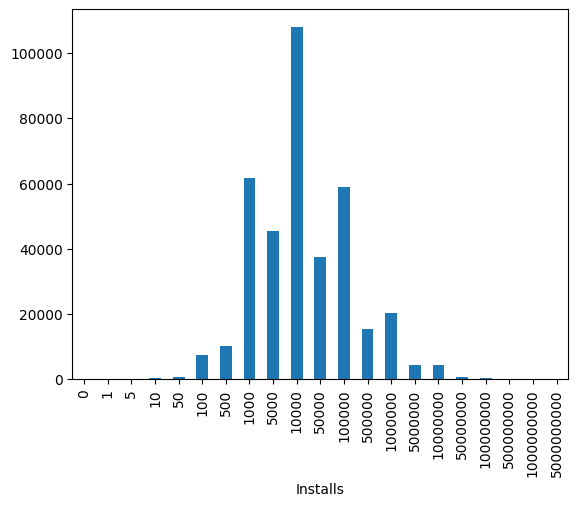

In [21]:
# 변환된 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')

위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.

5천만회 이상 설치한 앱의 개수를 모두 천만회 이상 설치한 앱의 개수로 통합합니다.

즉, 다른 말로 하면 5천만회 이상 설치, 1억회 이상 설치, 5억회 이상 설치한 앱의 `Installs` 값을 천만으로 변경합니다.

In [22]:
df_clean.loc[df_clean['Installs'] >= 5e7, 'Installs'] = 1e7
df_clean[df_clean['Installs'] >= 1e7]

,Unnamed: 0,Category,Rating,Rating Count,Installs,Free,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,0,Food & Drink,4.4,1258493.0,10000000,True,2020-07-07 00:14:05,Everyone,False,False,False
1,1,Travel & Local,4.4,1360172.0,10000000,True,2020-07-02 20:10:48,Everyone,True,False,False
5,5,Food & Drink,4.5,784802.0,10000000,True,2020-06-26 01:32:02,Everyone,False,False,False
7,7,Food & Drink,4.1,453646.0,10000000,True,2020-07-21 05:01:40,Teen,True,False,True
12,12,Food & Drink,4.7,1470566.0,10000000,True,2020-07-03 03:06:17,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
600301,600301,Video Players & Editors,3.1,16958.0,10000000,True,2020-07-20 08:00:31,Everyone,True,False,False
600463,600463,Entertainment,3.4,115801.0,10000000,True,2020-01-06 16:52:35,Everyone,False,True,False
600737,600737,Simulation,4.1,73495.0,10000000,True,2020-03-22 23:44:40,Teen,True,True,False
600873,600873,Social,4.2,31759.0,10000000,True,2020-02-13 15:48:20,Everyone,True,False,False


반대로 1000회 이상 설치보다 적은 설치횟수를 가지는 앱들은 데이터에서 제거합니다.

In [23]:
# 1000회 이상 설치되지 못한 앱들 데이터는 삭제
df_clean = df_clean.drop(df_clean[df_clean['Installs'] < 1000].index)

<Axes: xlabel='Installs'>

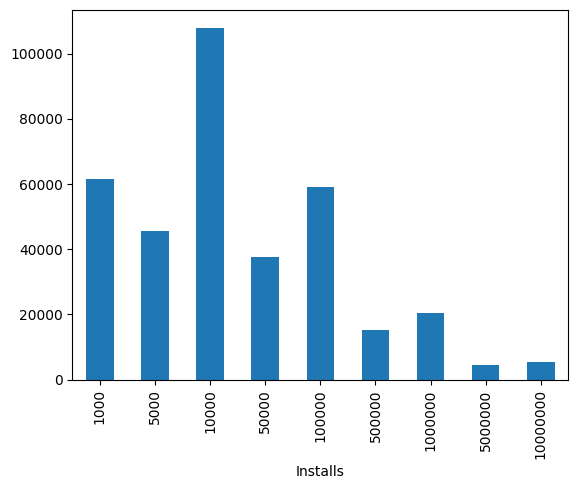

In [24]:
# 다시 분포를 출력합니다.
df_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')

### 3.3. `Free` 시각화

앱이 무료인지 여부를 알려주는 변수 `Free`를 시각화 해봅니다.

<Axes: xlabel='Free'>

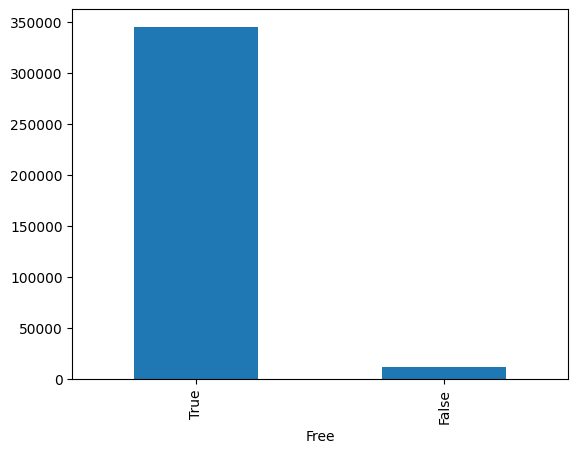

In [25]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Free'].value_counts().plot(kind='bar')

### 3.4. `Last Updated` 시각화

앱이 마지막으로 업데이트 된 날짜를 시각화 해봅니다.

In [26]:
# 분포를 도수분포표로 확인합니다.
df_clean['Last Updated'].value_counts()

Last Updated
2020-07-13 07:39:47    4
2020-04-15 19:45:13    4
2020-07-13 07:38:00    4
2020-07-08 14:07:44    4
2020-07-13 07:39:49    3
                      ..
2020-07-05 18:35:32    1
2020-03-31 13:38:00    1
2020-06-04 15:39:16    1
2018-08-18 15:36:33    1
2020-07-08 08:35:29    1
Name: count, Length: 355409, dtype: int64

본 데이터는 2020년 기준으로 수집한 데이터입니다.

따라서 2020년 중에 마지막으로 업데이트가 이루어진 경우엔 개발자가 앱을 계속해서 유지보수 및 개선을 진행하고 있다고 판단해도 괜찮을 것으로 보입니다.

반대로 말하면, 2020년 중에 업데이트가 이루어지지 않은 경우 지원이 다소 소홀해진 앱이라고 볼 수 있을 것입니다. 앱의 특성상 업데이트가 자주 이루어지지 않을 수도 있기는 하나, 분석을 간략하게 하기 위해 2020년에 업데이트가 이루어졌는지 여부만을 보고 새로운 변수를 생성하도록 하겠습니다.

새로운 변수명은 `2020 Updated`로 하겠습니다. 동시에 기존 `Last Updated` 변수는 제거하도록 하겠습니다.

In [27]:
# 날짜와 시간 정보인 Last Updated를 가공하여 2020년에 업데이트가 이루어졌는지 여부를 저장하는 변수를 만들겠습니다.
df_clean['2020 Updated'] = [date.split('-')[0] == '2020' for date in df_clean['Last Updated']]

# Last Updated 변수를 제거합니다.
df_clean = df_clean.drop('Last Updated', axis=1)

<Axes: xlabel='2020 Updated'>

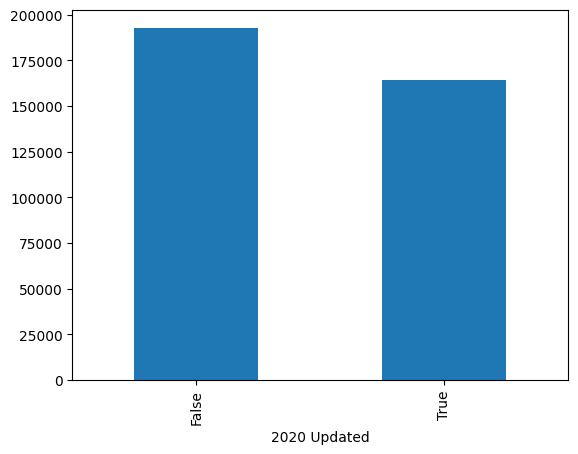

In [28]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['2020 Updated'].value_counts().plot(kind='bar')

### 3.5. `Content Rating` 시각화

앱의 권장 사용 연령을 나타내는 변수 `Content Rating`을 시각화 해봅니다.

<Axes: xlabel='Content Rating'>

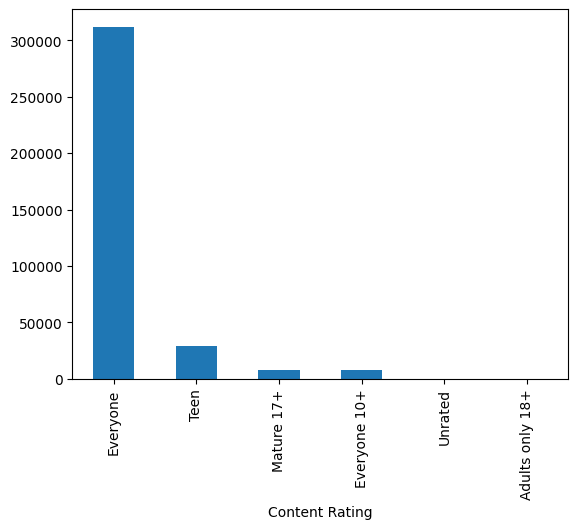

In [29]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Content Rating'].value_counts().plot(kind='bar')

### 3.6. `Ad Supported` 시각화

앱에 광고가 표시되는 여부를 나타내는 변수 `Ad Supported`를 시각화 해봅니다.

<Axes: xlabel='Ad Supported'>

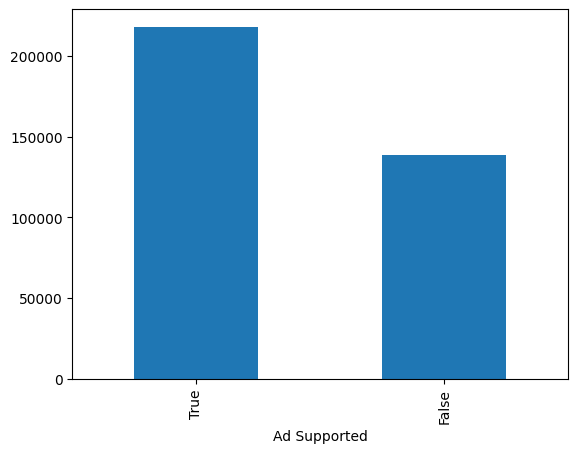

In [30]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Ad Supported'].value_counts().plot(kind='bar')

### 3.7. `In App Purchases` 시각화

앱내 구매가 지원되는지 여부를 나타내는 변수 `In App Purchases`를 시각화 해봅니다.

<Axes: xlabel='In App Purchases'>

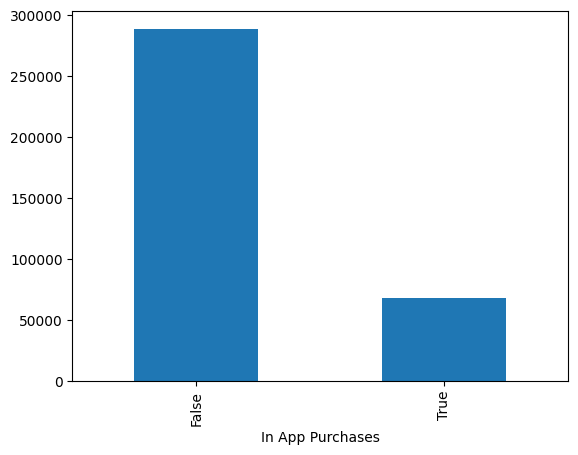

In [31]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['In App Purchases'].value_counts().plot(kind='bar')

### 3.8. `Editors Choice` 시각화

[**Editors Choice**](https://play.google.com/store/apps/editors_choice?hl=en_US&gl=US)란 언론사의 편집부(editorial board)가 직접 추천하거나 하는 기사처럼 Google Play Store 관리자가 직접 추천하는 앱을 의미합니다.

`Editors Choice` 변수는 앱이 이것에 선정되었는지 여부를 의미합니다.

<Axes: xlabel='Editors Choice'>

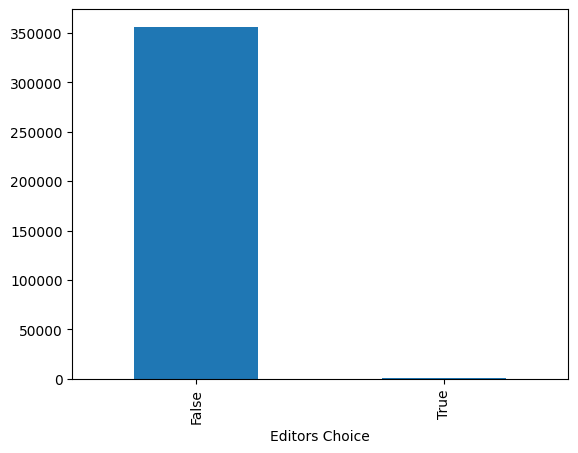

In [32]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Editors Choice'].value_counts().plot(kind='bar')

## 4. 데이터 전처리

앱 평점 예측을 수행하기 위해서 주어진 구글 앱 데이터에 대해서 회귀 모델을 사용할 것입니다.

이번 파트에서는 11개의 변수만을 사용하여 예측을 수행하지만, 나머지 12개의 변수들을 추가하여 입력 데이터를 확장할 수 있습니다.

회귀 모델의 필요한 입력 데이터를 준비하기 위해서 다음과 같은 전처리를 수행하겠습니다.

1. 카테고리형 변수를 수치 변수로 변환하기
2. 학습 데이터와 테스트 데이터로 나누기
3. 입력 변수들의 값의 크기 범위를 조정하기 위한 정규화

### 4.1. 가변수(Dummy Variable)를 활용하여 카테고리형 변수를 수치형으로 변환

머신러닝 모델은 수치형 데이터만을 입력으로 받을 수 있습니다. 그러나 본 데이터의 `Content Rating` 변수처럼 카테고리로 나눠진 변수도 있고, 이들이 우리가 예측하길 원하는 변수와 관련이 깊을 수도 있습니다.

따라서 이러한 카테고리형 변수를 수치형 변수로 바꿔주는 과정이 필요합니다. 이를 위한 기법에는 대표적으로 아래와 같은 것들이 있습니다.
- 카테고리 별로 정수 할당: `Content Rating` 변수를 예로 들면 `Everyone`에는 0, `Teen`에는 1 과 같은 방식입니다.
- One-hot Encoding
    - `Content Rating`의 개수가 5개라고 가정하면 row 하나당 길이 5짜리 벡터를 만들고 0으로 초기화 합니다. (`[0, 0, 0, 0, 0]`)
    - 각 row가 속한 카테고리의 위치에만 1을 표기합니다. 맨 처음이 `Everyone`을 의미하고, 현재 row가 `Everyone`이라면 `[1, 0, 0, 0, 0]` 과 같이 됩니다.


어느 방법을 쓰든 무방하지만, pandas에서는 one-hot encoding을 손쉽게 만들어주는 `get_dummies()`라는 함수가 존재합니다.

이 함수는 앞서 말한 one-hot encoding을 위한 가변수를 생성해줍니다. 가령 `Content Rating`에 있는 값이 `Everyone`과 `Teen` 뿐이었다고 가정했을 때, `get_dummies()`를 적용하면 아래와 같은 가변수가 생성됩니다.
- `Content Rating_Everyone`
- `Content Rating_Teen`

그러면 값이 `Everyone`이었던 row는 새로 생성된 `Content Rating_Everyone` 변수의 값이 1이 되는 형식입니다. 이러면서 기존에 있던 `Content Rating`이라는 변수 자체는 사라지게 됩니다.

이번 실습에서는 위의 함수를 통해 `Content Rating` 변수에 one-hot encoding을 적용해보도록 하겠습니다.

In [33]:
# 먼저 True, False 값을 가지는 변수는 replace를 사용하여 0, 1로 변환 합니다.
df_clean = df_clean.replace([True, False], [1, 0])

In [34]:
# 다음으로 현재 카테고리형 변수가 어떤 것들이 있는지 확인해봅니다.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357111 entries, 0 to 603006
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        357111 non-null  int64  
 1   Category          357111 non-null  object 
 2   Rating            357111 non-null  float64
 3   Rating Count      357111 non-null  float64
 4   Installs          357111 non-null  int64  
 5   Free              357111 non-null  int64  
 6   Content Rating    357111 non-null  object 
 7   Ad Supported      357111 non-null  int64  
 8   In App Purchases  357111 non-null  int64  
 9   Editors Choice    357111 non-null  int64  
 10  2020 Updated      357111 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 32.7+ MB


확인 결과 카테고리형 변수, 즉 dtype이 `object`로 나타나는 변수는 `Category`와 `Content Rating` 두가지인 것으로 확인하였습니다.

이들을 `get_dummies()` 함수를 활용하여 one-hot encoding을 적용하겠습니다.

In [35]:
df_onehot = pd.get_dummies(
    df_clean,
    prefix=['Category', 'Content Rating'],
    columns=['Category', 'Content Rating']
)

df_onehot

,Unnamed: 0,Rating,Rating Count,Installs,Free,Ad Supported,In App Purchases,Editors Choice,2020 Updated,Category_Action,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,4.4,1258493.0,10000000,1,0,0,0,1,False,...,False,False,False,False,False,True,False,False,False,False
1,1,4.4,1360172.0,10000000,1,1,0,0,1,False,...,False,False,False,False,False,True,False,False,False,False
2,2,4.2,5532.0,500000,1,0,0,0,1,False,...,False,False,False,False,False,True,False,False,False,False
3,3,4.7,2531.0,10000,0,0,0,0,1,False,...,False,False,False,False,False,True,False,False,False,False
4,4,4.4,197649.0,5000000,1,1,0,0,1,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602982,602982,3.9,464.0,50000,1,0,0,0,0,False,...,False,False,False,False,False,True,False,False,False,False
602983,602983,3.8,441.0,50000,1,0,0,0,0,False,...,False,False,False,False,False,True,False,False,False,False
602985,602985,4.3,27.0,5000,1,0,0,0,0,False,...,False,False,False,False,False,True,False,False,False,False
603005,603005,4.1,12464.0,1000000,1,1,0,0,1,False,...,False,False,False,False,False,True,False,False,False,False


`get_dummies()` 함수를 적용한 이후에 기존 `Category`와 `Content Rating` 변수가 사라졌는지 확인합니다.

In [36]:
if 'Category' not in df_onehot.columns:
    print("'Category' 이름의 변수는 존재하지 않습니다.")

if 'Content Rating' not in df_onehot.columns:
    print("'Content Rating' 이름의 변수는 존재하지 않습니다.")

'Category' 이름의 변수는 존재하지 않습니다.
'Content Rating' 이름의 변수는 존재하지 않습니다.


### 4.2. 학습, 테스트 데이터 분리

학습 데이터와 테스트 데이터를 분리하기에 앞서 먼저 모델의 입력 데이터(X)와 출력 데이터(y)를 정의해야 합니다.

이번 실습에서는 평점(`Rating`)을 예측하는 회귀 모델을 만드는 것이 목표이기 때문에 X에서는 `Rating`을 제거하고, y는 `Rating` 변수의 값만 가지도록 만들겠습니다.

In [37]:
# 먼저 one-hot encoding이 완료된 데이터에서 입력값을 만듭니다.
X = df_onehot.drop("Rating", axis=1)
X

,Unnamed: 0,Rating Count,Installs,Free,Ad Supported,In App Purchases,Editors Choice,2020 Updated,Category_Action,Category_Adventure,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,1258493.0,10000000,1,0,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,1360172.0,10000000,1,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2,5532.0,500000,1,0,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3,2531.0,10000,0,0,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,197649.0,5000000,1,1,0,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602982,602982,464.0,50000,1,0,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
602983,602983,441.0,50000,1,0,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
602985,602985,27.0,5000,1,0,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
603005,603005,12464.0,1000000,1,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False


In [38]:
# 예측해야 할 변수 `Rating`만 출력값으로 만듭니다.
y = df_onehot['Rating']
y

0         4.4
1         4.4
2         4.2
3         4.7
4         4.4
         ... 
602982    3.9
602983    3.8
602985    4.3
603005    4.1
603006    3.6
Name: Rating, Length: 357111, dtype: float64

이제 학습 데이터와 테스트 데이터를 분리해야 합니다. 그 이유는 다음과 같습니다.

머신러닝 모델의 학습 목적은 다양하게 있겠지만 본질적으로는 데이터를 보고 사람이 판단하던 것을 기계로 자동화하는 것입니다. 따라서 **계속 새로운 데이터가 생성되는 환경**에서 가령 분류 작업 같은 것을 지속적으로 진행하는 경우에 이 작업을 머신러닝 모델로 대체한다면 바람직할 것입니다.

여기서 핵심은 머신러닝 모델이 **미래에 생성될 새로운 데이터**에서도 작업을 원활히 수행해야 한다는 부분입니다. 따라서 머신러닝 모델을 학습하는 과정에서 **가지고 있는 데이터셋 중 이 새로운 데이터를 모방**할 방법이 필요합니다.

그럼 여기서 의문을 가질 수도 있습니다. 그런 거 모방 안하고 그냥 **가지고 있는 데이터셋 전부 그냥 학습에 사용해도 괜찮은 것 아닐까요?**

그럴 경우 모델이 학습에 사용한 데이터에만 성능이 좋고 **새로운 데이터에는 일을 전혀 제대로 못하는 상황**이 생길 수 있습니다. 이를 바로 **과적합(Overfitting)** 이라 부릅니다.

따라서 가지고 있는 데이터셋을 학습에 사용할 **학습 데이터(Train)** 와 새로운 데이터로 가정할 **테스트 데이터(Test)** 로 분리하는 과정을 항상 거쳐야 합니다. 데이터셋에 따라선 이 두가지가 분리된 채로 제공되는 경우도 많지만 이 실습의 경우 데이터셋이 하나로 제공되었으므로 분리해야 합니다.

In [39]:
# sklearn에서 제공하는 train_test_split을 사용하여 손쉽게 분리할 수 있습니다.
# 테스트 데이터를 전체의 30% 비율로 설정하여 나누겠습니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

### 4.3. 정규화 (Normalization)

다음으로 흔히 수행하는 전처리에는 정규화(Normalization)가 있습니다. 정규화는 **입력 데이터**에만 적용하며, 정규화를 수행하는 이유는 **변수 별로 값의 크기 범위가 달라서 모델 학습에 편향이 생길 수 있는 문제를 방지**하는 것에 있습니다.

가령 A 변수는 값의 범위가 0 ~ 10 사이이고, B 변수는 100 ~ 100,000 사이라면 B 변수가 모델 학습에 대부분의 영향을 미칠 것입니다.

따라서 변수 별로 값의 범위가 다른 것을 일정한 범위 내로 일치시켜 주기 위해 사용하는 것이 바로 정규화라고 할 수 있습니다.

여담으로 **출력 데이터**에는 적용하지 않는 이유는 예측하는 값 그 자체를 모델로부터 얻는 것이 목적이기 때문입니다. 본 실습도 평점 그 자체를 보면 직관적이지만, 정규화된 값은 그렇지 않을 것입니다. 사실 아주 특수한 경우라면 출력 데이터에도 정규화를 적용하는 경우가 있을 수는 있지만, 일반적으로는 거의 수행하지 않는다고 보셔도 무방합니다.

정규화에는 크게 두가지 기법이 존재합니다.
1. **Min-Max Normalization**
    - 최소-최대 정규화라고 하며 각 변수의 최소값과 최대값을 이용하여 값의 범위를 조정하는 것입니다.
    - 아래 수식을 통해 모든 변수의 값의 범위가 **0에서 1 사이**로 바뀌게 됩니다.
        - $X = \{X_1, X_2, ..., X_n\}$ 를 의미하며, $X$ 전체가 변수 하나라고 보시면 됩니다. 즉 $X_{i}$는 변수 $X$의 i번째 row의 값입니다.
$$ X_{i, \text{norm}} = \frac{X_i - \min{(X)}}{\max{(X)} - \min{(X)}}, (1 \leq i \leq n) $$

2. **Standardization**
    - 표준화라고 하며 각 변수의 값의 분포를 평균은 0이고, 표준편차는 1이 되게 조정하는 것입니다.
    - 아래 수식을 통해 값의 범위를 바꿉니다. 표준 정규분포처럼 만들기 때문에 값의 범위에는 상한과 하한이 없습니다.
        - $X = \{X_1, X_2, ..., X_n\}$ 를 의미하며, $X$ 전체가 변수 하나라고 보시면 됩니다. 즉 $X_{i}$는 변수 $X$의 i번째 row의 값입니다.
$$ X_{i, \text{norm}} = \frac{X_i - \mu}{\sigma}, (1 \leq i \leq n) $$
$$ \text{where } \mu = \frac{1}{n} \sum_{i=1}^{n}X_i,\ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n}(X_i - \mu)^2 $$

이렇게 보면 복잡해보이기도 하지만 이미 `scikit-learn`에는 이를 코드 몇줄로 수행할 수 있게끔 API가 마련되어 있습니다.

본 실습에서는 표준화를 사용하여 정규화를 수행하도록 하겠습니다.

In [40]:
# 표준화를 위한 StadardScaler 객체 생성
scaler = StandardScaler()

# X_train로 scaler를 학습한 후 적용
X_train = scaler.fit_transform(X_train)

일단 학습 데이터의 입력값(`X_train`)에는 정규화를 적용했습니다. 그런데 테스트 데이터의 입력값(`X_test`)에는 어떻게 해야 할까요?

앞서 보시면 `X_train`에는 `fit_transform`을 사용하여 scaler를 만들었습니다. 이 `fit_transform`은 scikit-learn에서 자주 쓰이는 메소드명으로 `fit`과 `transform` 과정을 하나로 합쳐준 것입니다.
- `fit` : 보통 모델을 **학습**하는 용도로 사용하는 메소드명입니다. `StandardScaler`에서는 주어진 데이터에서 각 변수 별로 평균값($\mu$)과 표준편차($\sigma$) 값을 구합니다.
- `transform` : `StandardScaler` 기준으로 `fit`에서 구한 평균과 표준편차로 주어진 데이터를 정규화합니다.

즉, 앞서 `X_train`을 넣어서 `fit_transform`을 적용한 결과로 `scaler`에는 학습 데이터의 평균과 표준편차가 저장되어 있습니다.

**그러면 테스트 데이터에도 똑같이 `fit_transform`을 적용해서 `scaler`에 새로운 평균과 표준편차를 저장해야 할까요?**

결론부터 말하면 그러면 안됩니다. 이는 앞서 **테스트 데이터를 왜 나눴는지**를 상기해보면 쉽게 이해할 수 있습니다.

테스트 데이터를 나눈 이유는 **미래에 생성될 미지의 데이터**를 모방하기 위함이었습니다. 그런데 미래에 생성될 데이터의 양도 모르고, 값도 모르는데 **어떻게 평균과 표준편차를 구할 수 있을까요?**

즉 테스트 데이터에서 평균과 표준편차를 구할 수 있는 것처럼 보이는 건 단순히 모델을 학습하는 과정에서 가진 데이터셋을 나눴기 때문인 것입니다.

따라서 테스트 데이터에는 앞서 학습 데이터에서 구한 평균과 표준편차를 이용해서 정규화를 수행해야 합니다. 즉 코드로 하면 `transform` 메소드만 적용해야 하는 것입니다.

In [41]:
# X_test에는 X_train으로 학습된 scaler를 적용만 함
X_test = scaler.transform(X_test)

이로써 본격적으로 모델 학습을 위한 사전 작업이 모두 완료되었습니다.

## 5. 모델 학습 및 평가

이제 본격적으로 모델 학습을 진행해보겠습니다.

평점이라는 연속된 값을 예측하는 만큼 앞서도 언급했듯이 **회귀(Regression)** 모델을 사용할 것입니다.

먼저 가장 기본적인 회귀 모델인 **선형 회귀(Linear Regression)** 모델을 적용해보겠습니다.

### 5.1. 선형 회귀

In [42]:
# 선형 회귀 모델을 불러옵니다.
lr_model = LinearRegression()

# fit 함수를 사용하여 학습을 수행합니다.
lr_model.fit(X_train, y_train)

LinearRegression()

다음으로 모델 학습이 잘 이루어졌는지 평가해야 합니다.

회귀 모델을 평가하기 위한 지표로는 일반적으로 아래의 지표들을 사용합니다.

- **Mean Squared Error(MSE)**: 실제값($y$)과 예측값($\hat{y}$)의 차이인 오차(Error)의 제곱의 평균입니다.
$$ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2 $$
- **Root Mean Squared Error(RMSE)**: MSE에 제곱근을 씌운 값입니다.
$$ \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2} $$
- **Mean Absolute Error(MAE)**: 실제값($y$)과 예측값($\hat{y}$)의 차이인 오차(Error)의 절대값의 평균입니다.
$$ \text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}| $$
- **R-squared ($R^2$) score**: 다른 말로는 **결정 계수(Coefficient of determination)** 이라고도 부르는 값입니다. 이를 정의하기 위해선 두가지 값을 더 계산해야 합니다.
    - Residual sum of squares: $ SS_{res} = \sum_{i=1}^{n}(y_i-\hat{y_i})^2 $
    - Total sum of squares: $ SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y})^2 $, where $ \bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i $
    - $ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $
    - $R^2$ score는 모델이 완벽하게 예측했을 때 최대 1의 값을 가집니다. 대신 최저값은 0이 아닌 음수도 될 수 있기 때문에 따로 없습니다.

$R^2$ score는 사실 정의만 봐서는 쉽게 와닿지 않을 수 있습니다. 모든 회귀 모델에서 사용할 수 있는 평가 지표이지만, 선형 회귀 모델에 한해서는 아래와 같은 그림을 통해 쉽게 이해할 수 있을 것입니다.

<center><img src="img/r2_score.png" width=500px></center>

직선이 학습된 회귀 모델일 때 오른쪽이 $R^2$ score가 더 1에 가깝게 나옵니다. 즉 1에 가까울수록 데이터가 직선에 가깝게 분포된 것이라고도 할 수 있습니다.

이러한 평가 지표들도 정의는 다소 복잡할 수 있지만, scikit-learn을 사용한다면 API 함수를 통해 한줄로 구할 수 있는 값들입니다.

아래에서는 먼저 학습 데이터를 모델이 잘 학습했는지 위에서 언급한 평가지표들을 통해 확인해보겠습니다.

In [43]:
# 먼저 평가지표들을 한번에 확인할 수 있게끔 하는 함수를 만들겠습니다.
def check_metrics(model, model_name, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) # squared=False 옵션을 주면 RMSE로 계산
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"[{model_name} - Train] MSE      : {mse_train:.6f}")
    print(f"[{model_name} - Train] RMSE     : {rmse_train:.6f}")
    print(f"[{model_name} - Train] MAE      : {mae_train:.6f}")
    print(f"[{model_name} - Train] R2 score : {r2_train:.6f}")
    print("=" * 50)
    print(f"[{model_name} - Test ] MSE      : {mse_test:.6f}")
    print(f"[{model_name} - Test ] RMSE     : {rmse_test:.6f}")
    print(f"[{model_name} - Test ] MAE      : {mae_test:.6f}")
    print(f"[{model_name} - Test ] R2 score : {r2_test:.6f}")
    

In [44]:
# 선형 회귀 모델의 성능을 확인합니다.
check_metrics(lr_model, "Linear Regression", X_train, X_test, y_train, y_test)

[Linear Regression - Train] MSE      : 0.304635
[Linear Regression - Train] RMSE     : 0.551937
[Linear Regression - Train] MAE      : 0.412626
[Linear Regression - Train] R2 score : 0.093654
[Linear Regression - Test ] MSE      : 0.306503
[Linear Regression - Test ] RMSE     : 0.553627
[Linear Regression - Test ] MAE      : 0.412511
[Linear Regression - Test ] R2 score : 0.093802


학습 데이터와 테스트 데이터 모두 좋지 못한 결과가 나오고 있습니다.

이 말은 즉, 선형 회귀 모델로는 본 실습의 데이터를 학습하기에 부족하다는 의미입니다.

이제 좀 더 복잡한 모델을 통해 성능을 개선할 수 있는지 확인해보겠습니다.

### 5.2. Decision Tree 및 Random Forest

다음으로 활용할 모델은 분류 모델로도 유명한 Decision Tree와 Random Forest입니다.

이들은 분류 모델로 많이 사용하지만 회귀 모델로도 활용할 수 있습니다.

Decision Tree를 활용한 회귀는 분류 모델일 때의 알고리즘이랑 거의 유사합니다. 분류 모델과 관련된 내용은 뒤에 나오는 수업에서 다루고 여기서는 회귀에 활용할 때의 특징만 확인해보겠습니다.

Decision Tree라는 것은 기본적으로 스무고개를 구현한 것이라고 봐도 됩니다. 즉 여러 질문들이 있을 때 해당 질문의 답변에 따라 갈래가 나뉘어 최종적으로 원하는 결론에 도달하는 방식입니다.

그래서 Decision Tree 모델 학습의 핵심은 주어진 데이터에서 **질문의 기준을 어떻게 정할 것인가?** 로 요약할 수 있습니다.

<center><img src="./img/decision_tree_sample.png" width=400px></center>

그럼 질문의 기준은 어떻게 정하는 것일까요? 여기에는 이론적 배경이 많이 깔려있어서 자료가 굉장히 장황해질 수 있기 때문에 간단하게만 언급하고 넘어가겠습니다.

일단은 Google Play Store 데이터에서 one-hot encoding을 아직 수행하기 전의 모습을 확인해보겠습니다. (one-hot encoding 이후의 것을 봐도 되지만, 변수 개수가 너무 많아져서 간결함을 위한 것이니 참고 바랍니다.)

In [45]:
df_clean

,Unnamed: 0,Category,Rating,Rating Count,Installs,Free,Content Rating,Ad Supported,In App Purchases,Editors Choice,2020 Updated
0,0,Food & Drink,4.4,1258493.0,10000000,1,Everyone,0,0,0,1
1,1,Travel & Local,4.4,1360172.0,10000000,1,Everyone,1,0,0,1
2,2,Shopping,4.2,5532.0,500000,1,Everyone,0,0,0,1
3,3,Food & Drink,4.7,2531.0,10000,0,Everyone,0,0,0,1
4,4,Food & Drink,4.4,197649.0,5000000,1,Mature 17+,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
602982,602982,Lifestyle,3.9,464.0,50000,1,Everyone,0,0,0,0
602983,602983,Travel & Local,3.8,441.0,50000,1,Everyone,0,0,0,0
602985,602985,Communication,4.3,27.0,5000,1,Everyone,0,0,0,0
603005,603005,Entertainment,4.1,12464.0,1000000,1,Everyone,1,0,0,1


이제 각 변수 별로 값의 범위를 일련의 알고리즘을 통해 나눈 다음에 **어떤 기준값**이 최소가 되도록 tree의 각 node를 나누게 됩니다.

가령 `Rating Count`가 10,000을 넘는지의 여부에 따라 나눴다고 가정해 봅시다. 그럼 위의 예시에서 첫번째, 두번째 row랑 세번째, 네번째 row는 서로 다른 node로 분리될 것입니다.

<center><img src="./img/decision_tree_rating_count.png" width=400px></center>

그럼 이렇게 나누었을 때 각 node에 들어가는 모든 예측 대상값 (여기서는 평점)의 표준편차를 구할 수 있습니다.

바로 각 node의 표준편차 값이 최소가 되도록 나누는 것이 Decision Tree 기반 회귀 모델의 학습이라고 할 수 있습니다. 위의 예시에서는 임의로 나눴지만, 만약 다른 변수에서 각 node의 표준편차가 낮아지는 기준이 발견되면 해당 기준으로 바뀔 것입니다.

그럼 학습된 Decision Tree에서 예측값을 구할 때는 어떻게 할까요?

모델이 학습이 되면 여러 계층의 tree에서 말단 node(leaf node)들이 생길 텐데, 해당 node에 배정된 평점 값들의 평균값들이 정해져있을 것입니다.

<center><img src="./img/decision_tree_predict.png" width=400px></center>

그러면 예측을 위해 입력된 데이터가 나눠진 조건에 따라 tree를 타고 내려와 말단 node에 도착했을 때, 해당 node의 평균값을 예측값으로 사용하게 됩니다.

따라서 decision tree를 통해 예측한 결과를 그래프로 그려보면 계단식으로 그려지는 것을 확인할 수 있습니다. 어떤 수식을 통해 새로 계산된 값이 아닌 node에 정해진 값들로 예측값의 집합이 결정되기 때문입니다.

<center><img src="./img/decision_tree_predict_graph.png" width=500px></center>

그러면 **Random Forest**는 무엇일까요? 이름에서도 짐작할 수 있듯이 여러 Decision Tree가 모인 것이 Random Forest입니다.

Random Forest를 만드는 방법은 전체 학습 데이터셋에서 임의의 개수를 뽑아낸 다음에 이걸로 Decision Tree를 학습합니다. 이를 지정한 Decision Tree 개수만큼 반복합니다.

<center><img src="./img/random_forest_example.png"></center>

예측할 때도 학습된 여러 Decision Tree가 내는 예측 결과를 종합해서 예측값을 결정합니다. 보통은 가장 많은 Decision Tree가 내놓은 예측값을 사용하게 됩니다.

이제 본격적으로 scikit-learn을 통해 Decision Tree와 Random Forest를 활용한 회귀 모델을 학습해 보겠습니다.

Random Forest 학습에는 시간이 다소 걸릴 수 있습니다.

In [46]:
# Decision Tree 회귀 모델을 불러옵니다.
dt_model = DecisionTreeRegressor()

# Random Forest 회귀 모델을 불러옵니다.
rf_model = RandomForestRegressor(n_estimators=10)

# fit 함수를 사용하여 학습을 수행합니다.
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

평가는 회귀 모델인 만큼 선형 회귀와 동일하게 진행합니다.

In [47]:
# Decision Tree 성능 확인
check_metrics(dt_model, "Decision Tree", X_train, X_test, y_train, y_test)

[Decision Tree - Train] MSE      : 0.000000
[Decision Tree - Train] RMSE     : 0.000000
[Decision Tree - Train] MAE      : 0.000000
[Decision Tree - Train] R2 score : 1.000000
[Decision Tree - Test ] MSE      : 0.534510
[Decision Tree - Test ] RMSE     : 0.731102
[Decision Tree - Test ] MAE      : 0.521989
[Decision Tree - Test ] R2 score : -0.580317


In [48]:
# Random Forest 성능 확인
check_metrics(rf_model, "Random Forest", X_train, X_test, y_train, y_test)

[Random Forest - Train] MSE      : 0.054985
[Random Forest - Train] RMSE     : 0.234490
[Random Forest - Train] MAE      : 0.159575
[Random Forest - Train] R2 score : 0.836408
[Random Forest - Test ] MSE      : 0.315657
[Random Forest - Test ] RMSE     : 0.561834
[Random Forest - Test ] MAE      : 0.408282
[Random Forest - Test ] R2 score : 0.066737


Decision Tree나 Random Forest 모두 학습은 잘 된 거 같은데 테스트 데이터에선 $R^2$ score가 음수가 나올 정도로 예측을 못하고 있는 것을 확인할 수 있습니다. 즉 오히려 선형 회귀보다도 테스트 데이터는 예측을 제대로 하지 못하는 것입니다.

이를 좀 더 개선할 수 있는 다른 모델은 없는지 확인해보겠습니다.

### 5.3. XGBoost 회귀 모델

[XGBoost](https://xgboost.readthedocs.io/en/stable/)란 정확히 말하면 Gradient Boosting이라는 기법을 구현한 라이브러리의 이름입니다.

Gradient Boosting 기법은 흔히 **앙상블(Ensemble)** 기법이라 부르는 것의 일종입니다. 앞서 언급하지는 않았는데, 사실 Random Forest 또한 앙상블 기법의 일종이라고 할 수 있습니다.

즉 앙상블 기법의 전반적인 특징이라고 하면 **복수의 모델을 학습**시켜서 이 모델들이 내는 결과를 취합하여 최종 예측까지 수행하는 기법이라고 할 수 있습니다.

그러면 Gradient Boosting 기법이란 무엇일까요? 한문장으로 요약하면 **Gradient Descent를 활용하는 Boosting 기법**이라고 할 수 있습니다. 각각의 의미를 정리하면 다음과 같습니다.
- **Boosting 기법**: 여러 모델들이 있을 때, 성능이 좋지 않은 모델(weak learner)의 성능을 개선해가면서 전체 예측 성능을 높이는 기법
- **Gradient Descent**: 경사 하강법이라고 하며 손실 함수(Loss Function)의 최적화를 위해 사용하는 기법입니다. 나중에 딥러닝 관련 자료에서 자주 등장할 것입니다.

XGBoost가 좋은 이유는 앙상블 기법 중 성능이 일반적으로 좋은 Gradient Boosting 기법을 편하게 사용할 수 있으면서, 실제 구현 자체가 컴퓨팅 자원을 효율적으로 쓸 수 있게 개발되어서 모델 학습이 빠르게 이루어진다는 것입니다.

이제 XGBoost에서 지원하는 회귀 모델인 `XGBRegressor`를 활용하여 모델을 학습해 보겠습니다.

In [49]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)

C:\Users\3balb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# XGBRegressor 성능 확인
check_metrics(xgb_model, "XGBRegressor", X_train, X_test, y_train, y_test)

[XGBRegressor - Train] MSE      : 0.259956
[XGBRegressor - Train] RMSE     : 0.509859
[XGBRegressor - Train] MAE      : 0.373961
[XGBRegressor - Train] R2 score : 0.226581
[XGBRegressor - Test ] MSE      : 0.274847
[XGBRegressor - Test ] RMSE     : 0.524259
[XGBRegressor - Test ] MAE      : 0.383379
[XGBRegressor - Test ] R2 score : 0.187394


확실히 앞선 모델들보다 테스트에서 $R^2$ score가 잘 나오고 있는 모습을 확인할 수 있습니다. 덩달아서 MSE 같은 다른 평가지표도 더 낮은 값을 보이면서 확실히 나은 모습을 보이고 있습니다.

## 제출

이제 앞서 다룬 내용을 바탕으로 제출을 위한 데이터를 불러와 `Rating` 값을 예측해보도록 합니다. 

제출을 위한 데이터는 `webapp_test_feature.csv` 라는 이름으로 저장되어 있습니다. 전처리를 전혀 거치지 않은 상태에서 `Rating` 변수만 빠진 데이터이기 때문에 앞서 2, 3단원에서 수행했던 전처리를 모두 수행해야 합니다.

특히 `Installs` 횟수가 1000회에 미치지 못하는 row를 모두 삭제하는 부분이 있는데, 이를 채점 데이터에도 똑같이 적용해야 합니다. 그렇지 않으면 정답 개수와 제출을 위해 예측한 평점 개수가 일치하지 않을 것입니다. 채점에 사용하는 데이터의 개수는 **44,910** 개입니다.

제출을 위해선 예측한 평점값을 아래와 같이 DataFrame 형태로 만들어 `submission.csv` 이름으로 저장합니다. 이때 반드시 평점 컬럼의 이름은 `Rating` 이어야 합니다.

| index | Rating |
|-------|--------|
| 0     | 4.0  |
| 1     | 4.2 |
| 2     | 4.1 |
| 3     | 4.6 |
| 4     | 4.5 |

통과 기준은 예측한 값의 **$R^2$ score가 0.25 이상**이면 통과입니다. 이를 위해선 앞서 학습한 모델 중 하나를 골라 파라미터를 바꿔서 학습하는 과정이 필요할 수 있습니다. 아래 링크를 통해 각 모델에 사용할 수 있는 파라미터들을 확인해보세요.
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    - Linear Regression은 그 자체로 모델 성능에 변화를 일으킬 만한 파라미터가 있지는 않습니다.
    - 따라서 다항 회귀 (Polynomial Regression) 기법을 통해 선형 회귀 모델을 개선해볼 수 있습니다.
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
    - 바꿔볼만한 파라미터: `criterion`, `max_depth`, `min_samples_split`
    - 각 파라미터의 자세한 설명은 API 문서를 참고하세요.
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
    - 바꿔볼만한 파라미터: `n_estimators`, `criterion`, `max_depth`, `min_samples_split`
    - 각 파라미터의 자세한 설명은 API 문서를 참고하세요.
- [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)
    - 바꿔볼만한 파라미터: `n_estimators`, `max_depth`, `tree_method`
    - 각 파라미터의 자세한 설명은 API 문서를 참고하세요.

In [82]:
#csv 파일 읽기
pred = pd.read_csv('./data/webapp_test_feature.csv')
pred.head(10)

,App Name,App Id,Category,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,Earth & Moon in HD Gyro 3D Parallax Live Wallp...,com.afkettler.earth,Personalization,73806.0,"5,000,000+",5000000.0,7209120,True,0.0,USD,...,CodeKonditor,https://www.facebook.com/codekonditor,mail@codekonditor.com,"Nov 10, 2013",2020-03-21 18:49:16,Everyone,http://www.codekonditor.com/privacy/,False,False,False
1,TakeLessons Live,com.takelessons.tma_android,Education,227.0,"10,000+",10000.0,36956,True,0.0,USD,...,TakeLessons,https://www.takelessons.com,info@takelessons.com,"Oct 5, 2016",2020-07-10 20:59:19,Everyone,https://takelessons.com/privacy,False,False,False
2,Taxi Driving Simulation Be Quick in the City,com.ozGames.taxiDrivingSimulatorDriftPro,Simulation,33.0,"1,000+",1000.0,1251,True,0.0,USD,...,ayris soft,https://ayrissoft.github.io/,hakansatilmis@gmail.com,"Apr 30, 2020",2020-05-01 16:59:24,Teen,https://justpaste.it/27fzs,True,False,False
3,دیکشنری انگلیسی به فارسی آلفا,ir.alphasoft.dictionary,Education,34.0,"1,000+",1000.0,1163,True,0.0,USD,...,Digi.Soft,http://digivpn.xyz,digi.vpn.com@gmail.com,"Mar 10, 2019",2019-03-11 13:58:28,Everyone,http://www.movinapp.com/apps-privacy-policy/,True,False,False
4,Biblia de Jerusalén / Biblia Católica,com.appslitedesarrolladores.bibliadejerusalen,Books & Reference,98.0,"10,000+",10000.0,41051,True,0.0,USD,...,Apps Free Lite,https://appsfreelite.blogspot.com/,appsfreelite@gmail.com,"Oct 22, 2018",2020-04-09 10:35:46,Teen,https://docs.google.com/document/d/e/2PACX-1vQ...,True,False,False
5,TukangSayur.co,tukangsayur.co,Shopping,2486.0,"100,000+",100000.0,156643,True,0.0,USD,...,Mahakarya Tukangsayur Indonesia,https://www.tukangsayur.co,customercare@tukangsayur.co,"Nov 16, 2018",2020-05-11 02:38:07,Everyone,https://www.tukangsayur.co/#/privacy-policy,False,False,False
6,PieChart Maker: Circular Graph Generator,com.ineriam.piechart.maker,Tools,153.0,"50,000+",50000.0,57171,True,0.0,USD,...,INERIAM Ingeniería Multimedia,http://www.ineriam.com,info@ineriam.com,"Dec 21, 2018",2019-10-14 21:00:23,Everyone,http://www.ineriam.com/piechartmaker/privacy.html,True,True,False
7,Wind Wings: Space Shooter - Galaxy Attack,com.Wind.wings.Space.Shooter,Arcade,4660.0,"500,000+",500000.0,697174,True,0.0,USD,...,GCenter,http://gcenterstudio.com,hoasinh01@gmail.com,"Jan 18, 2020",2020-07-21 16:28:20,Everyone 10+,https://gcenter-com.webnode.vn/privacy-policy/,True,True,False
8,NikahinKerala Muslim Matrimony,com.nikahinkerala.app.full,Social,2513.0,"100,000+",100000.0,106261,True,0.0,USD,...,eBeamsInfoTech,http://www.nikahinkerala.com/,ebeamsinfo@gmail.com,"Aug 28, 2016",2020-06-27 13:37:38,Mature 17+,http://www.nikahinkerala.com/privacy_policy.php,False,False,False
9,BLW Ideas App,com.rdcbca80b3d2.www,Parenting,47.0,"10,000+",10000.0,18504,True,0.0,USD,...,BLW App,http://www.blwideasapp.com,anastasia@blwideasapp.com,"Jan 29, 2020",2020-07-01 22:43:18,Everyone,http://learn.appdocumentation.com/terms-and-co...,False,True,False


In [83]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46922 entries, 0 to 46921
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           46922 non-null  object 
 1   App Id             46922 non-null  object 
 2   Category           46922 non-null  object 
 3   Rating Count       46922 non-null  float64
 4   Installs           46922 non-null  object 
 5   Minimum Installs   46922 non-null  float64
 6   Maximum Installs   46922 non-null  int64  
 7   Free               46922 non-null  bool   
 8   Price              46922 non-null  float64
 9   Currency           46922 non-null  object 
 10  Size               46922 non-null  object 
 11  Minimum Android    46922 non-null  object 
 12  Developer Id       46922 non-null  object 
 13  Developer Website  46922 non-null  object 
 14  Developer Email    46922 non-null  object 
 15  Released           46922 non-null  object 
 16  Last Updated       469

In [84]:
pred.describe()

,Rating Count,Minimum Installs,Maximum Installs,Price
count,4.692200e+04,4.692200e+04,4.692200e+04,46922.000000
mean,1.948802e+04,1.030883e+06,1.867496e+06,0.234843
std,4.155627e+05,3.538073e+07,5.556903e+07,2.913898
min,1.100000e+01,0.000000e+00,0.000000e+00,0.000000
25%,4.400000e+01,5.000000e+03,7.021250e+03,0.000000
50%,1.890000e+02,1.000000e+04,3.058900e+04,0.000000
75%,1.262000e+03,1.000000e+05,1.751032e+05,0.000000
max,5.307079e+07,5.000000e+09,6.925157e+09,399.990000


### T2 데이터 정제

T2.1 변수 삭제

In [85]:
pred_clean = pred.drop(
    columns=[
        'App Name', 'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Currency', 'Size',
        'Released', 'Privacy Policy','Price', 'Minimum Installs', 'Minimum Android', 'Maximum Installs'
    ],
    axis = 1
)

pred_clean

,Category,Rating Count,Installs,Free,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Personalization,73806.0,"5,000,000+",True,2020-03-21 18:49:16,Everyone,False,False,False
1,Education,227.0,"10,000+",True,2020-07-10 20:59:19,Everyone,False,False,False
2,Simulation,33.0,"1,000+",True,2020-05-01 16:59:24,Teen,True,False,False
3,Education,34.0,"1,000+",True,2019-03-11 13:58:28,Everyone,True,False,False
4,Books & Reference,98.0,"10,000+",True,2020-04-09 10:35:46,Teen,True,False,False
...,...,...,...,...,...,...,...,...,...
46917,Education,431.0,"10,000+",True,2020-07-02 07:14:41,Everyone,False,True,False
46918,Educational,199.0,"100,000+",True,2020-03-23 14:30:59,Everyone,True,True,False
46919,Tools,33.0,"1,000+",True,2020-01-16 18:56:10,Everyone,False,False,False
46920,Lifestyle,52.0,"10,000+",True,2020-02-13 21:09:45,Everyone,False,False,False


T2.2 결측값 확인

In [86]:
pred_clean.isnull().sum()

Category            0
Rating Count        0
Installs            0
Free                0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

결측치가 없으므로 결측값 처리는 생략한다.

T3 데이터 정제

In [89]:
# Rating Count 값이 0인 데이터의 개수를 출력합니다.
# 값이 0인 경우는 없습니다.
len(pred_clean[pred_clean['Rating Count'] == 0])

0

In [90]:
# 'Rating Count' 값이 10보다 큰 경우 부터 의미 있는 데이터로 생각하고 10보다 작은 데이터는 삭제합니다.
pred_clean = pred_clean[pred_clean['Rating Count'] > 10]

C:\Users\3balb\AppData\Local\Temp\ipykernel_10380\3366456747.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


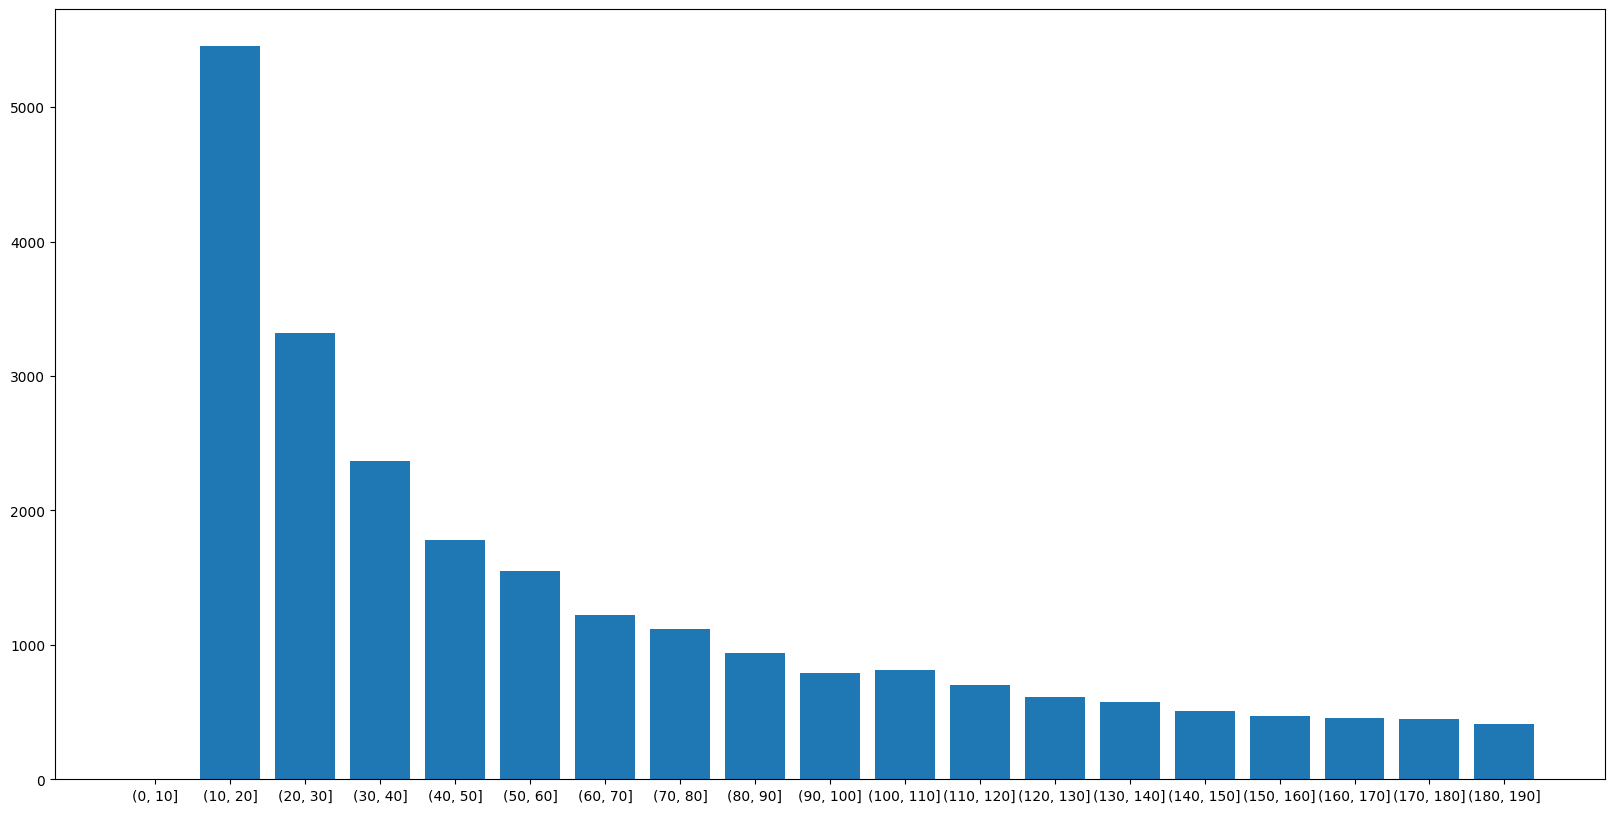

In [93]:
# Rating Count를 10개 단위로 나누어서 확인해본다
# Rating Count를 10단위로 분리하기 위해서 pd.cut을 사용한다.

import matplotlib.pyplot as plt
pred_cut_rating = pd.cut(pred_clean['Rating Count'], np.arange(0, 200, 10)).value_counts(sort=False)

# 히스토그램 출력
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(range(len(pred_cut_rating)), pred_cut_rating)

# X축 표기를 위한 세팅
ax.set_xticks(range(len(pred_cut_rating)))
ax.set_xticklabels(pred_cut_rating.index)
fig.show()

T3.2 Installs 시각화

<Axes: xlabel='Installs'>

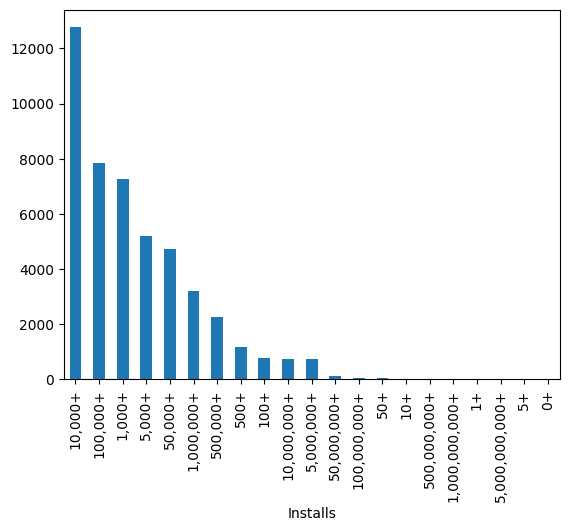

In [94]:
# 분포 막대 그래프를 사용하여 출력합니다.
pred_clean['Installs'].value_counts().plot(kind='bar')

In [95]:
# 문자열 데이터를 수치 자료형으로 변환합니다.
# + 삭제, 쉽표 삭제, int형 변화

for element in set(pred_clean['Installs']):
    pred_clean = pred_clean.replace(element, int(element.split('+')[0].replace(',', '')))

<Axes: xlabel='Installs'>

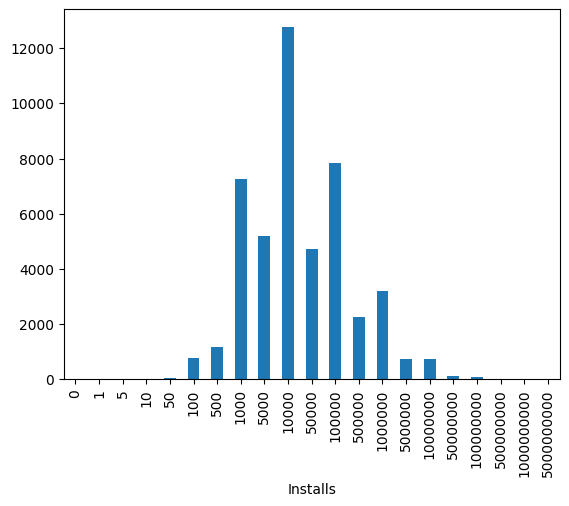

In [96]:
# 변환된 분포를 막대 그래프를 사용하여 출력합니다.
pred_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')

위 분포에서 양쪽 끝의 데이터들이 너무 작기에 이를 추가로 삭제합니다.

5천만회 이상 설치한 앱의 개수를 모두 천만회 이상 설치한 앱의 개수로 통합합니다.

즉, 다른 말로 하면 5천만회 이상 설치, 1억회 이상 설치, 5억회 이상 설치한 앱의 `Installs` 값을 천만으로 변경합니다.

In [98]:
pred_clean.loc[pred_clean['Installs'] >= 5e7, 'Installs'] = 1e7
pred_clean[pred_clean['Installs'] >= 1e7]

,Category,Rating Count,Installs,Free,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
85,Adventure,604323.0,10000000,True,2020-07-03 15:16:44,Teen,True,True,False
233,Health & Fitness,148088.0,10000000,True,2018-09-07 17:47:38,Everyone,True,True,False
305,Card,1303673.0,10000000,True,2020-07-21 16:29:35,Everyone,True,True,False
369,Travel & Local,861788.0,10000000,True,2020-07-21 02:32:08,Everyone,False,False,False
377,Casino,1683884.0,10000000,True,2020-07-19 23:38:08,Teen,True,True,False
...,...,...,...,...,...,...,...,...,...
46760,Productivity,299826.0,10000000,True,2020-07-14 16:59:45,Everyone,False,False,False
46791,Casual,56663.0,10000000,True,2020-06-24 12:06:41,Everyone,True,False,False
46800,Communication,126267.0,10000000,True,2020-01-29 17:14:22,Everyone,False,False,False
46807,Music & Audio,366870.0,10000000,True,2020-07-20 19:59:50,Teen,True,True,True


반대로 1000회 이상 설치보다 적은 설치횟수를 가지는 앱들은 데이터에서 제거합니다.

In [99]:
# 1000회 이상 설치되지 못한 앱들 데이터는 삭제
pred_clean = pred_clean.drop(pred_clean[pred_clean['Installs'] < 1000].index)

<Axes: xlabel='Installs'>

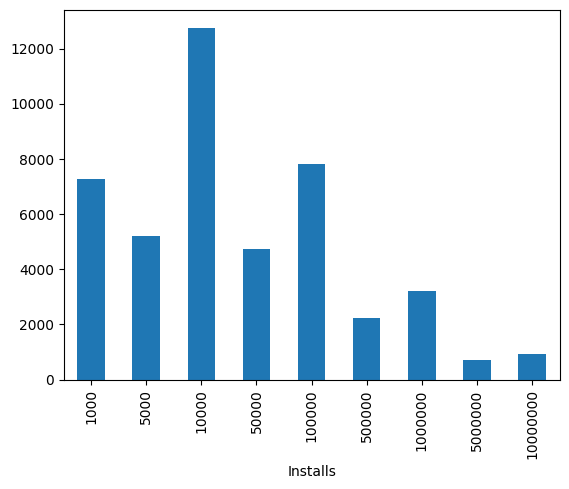

In [100]:
# 다시 분포를 출력합니다.
pred_clean['Installs'].value_counts().sort_index(ascending=True).plot(kind='bar')

T3.3 Free 시각화

앱이 무료인지 여부를 알려주는 변수 free를 시각화 해봅니다

<Axes: xlabel='Free'>

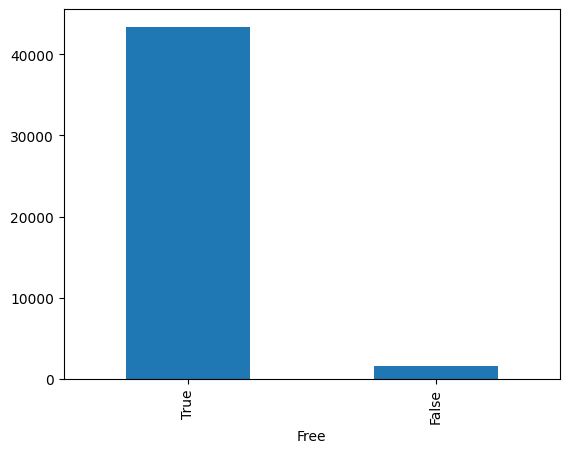

In [103]:
# 분포를 막대 그래프를 사용하여 출력합니다.
pred_clean['Free'].value_counts().plot(kind='bar')

 T3.4 Last Updated 시각화

In [107]:
#분표를 도수분표료로 확인합니다.

pred_clean['Last Updated'].value_counts()

Last Updated
2020-07-10 00:26:36    2
2020-07-17 12:40:11    2
2020-07-10 12:34:29    2
2020-07-17 03:10:57    2
2020-07-18 03:03:51    2
                      ..
2019-05-28 18:11:20    1
2020-07-07 21:31:21    1
2019-01-19 02:54:02    1
2020-07-14 22:16:08    1
2013-12-25 23:45:51    1
Name: count, Length: 44873, dtype: int64

In [108]:
# 날짜와 시간 정보인 Last Updated를 가공하여 2020년에 업데이트가 이루어졌는지 여부를 저장하는 변수를 만들겠습니다.
pred_clean['2020 Updated'] = [date.split('-')[0] == '2020' for date in pred_clean['Last Updated']]

# Last Updated 변수를 제거합니다.
pred_clean = pred_clean.drop('Last Updated', axis=1)

<Axes: xlabel='2020 Updated'>

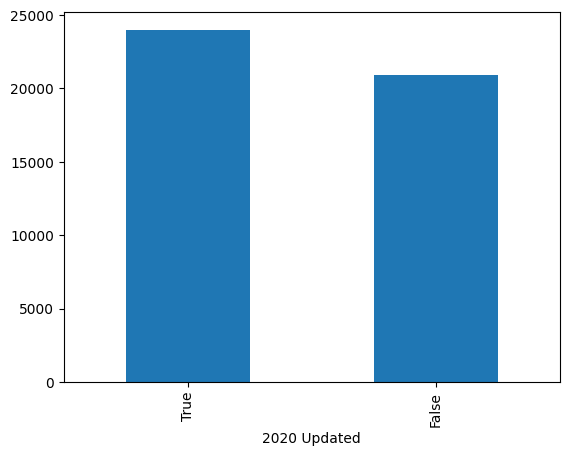

In [110]:
# 분포를 막대 그래프를 사용하여 출력합니다.
pred_clean['2020 Updated'].value_counts().plot(kind='bar')

### T3.5 Content Rating 시각화

<Axes: xlabel='Content Rating'>

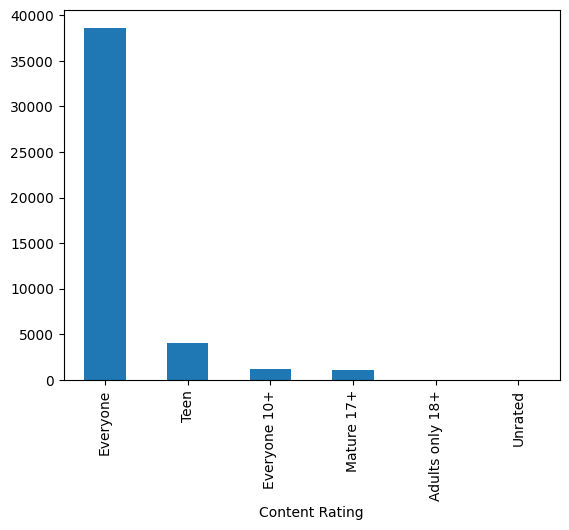

In [112]:
#분포를 막대 그래프를 사용하여 출력합니다. 

import matplotlib.pyplot as plt
pred_clean['Content Rating'].value_counts().plot(kind='bar')

In [113]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44910 entries, 0 to 46921
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          44910 non-null  object 
 1   Rating Count      44910 non-null  float64
 2   Installs          44910 non-null  int64  
 3   Free              44910 non-null  bool   
 4   Content Rating    44910 non-null  object 
 5   Ad Supported      44910 non-null  bool   
 6   In App Purchases  44910 non-null  bool   
 7   Editors Choice    44910 non-null  bool   
 8   2020 Updated      44910 non-null  bool   
dtypes: bool(5), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


### 4. 데이터 전처리

앱 평점 예측을 수행하기 위해서 주어진 구글 앱 데이터에 대해서 회귀 모델을 사용할 것입니다.

이번 파트에서는 11개의 변수만을 사용하여 예측을 수행하지만, 나머지 12개의 변수들을 추가하여 입력 데이터를 확장할 수 있습니다.

회귀 모델의 필요한 입력 데이터를 준비하기 위해서 다음과 같은 전처리를 수행하겠습니다.

1. 카테고리형 변수를 수치 변수로 변환하기
2. 학습 데이터와 테스트 데이터로 나누기
3. 입력 변수들의 값의 크기 범위를 조정하기 위한 정규화

### 4.1. 가변수(Dummy Variable)를 활용하여 카테고리형 변수를 수치형으로 변환

머신러닝 모델은 수치형 데이터만을 입력으로 받을 수 있습니다. 그러나 본 데이터의 `Content Rating` 변수처럼 카테고리로 나눠진 변수도 있고, 이들이 우리가 예측하길 원하는 변수와 관련이 깊을 수도 있습니다.

따라서 이러한 카테고리형 변수를 수치형 변수로 바꿔주는 과정이 필요합니다. 이를 위한 기법에는 대표적으로 아래와 같은 것들이 있습니다.
- 카테고리 별로 정수 할당: `Content Rating` 변수를 예로 들면 `Everyone`에는 0, `Teen`에는 1 과 같은 방식입니다.
- One-hot Encoding
    - `Content Rating`의 개수가 5개라고 가정하면 row 하나당 길이 5짜리 벡터를 만들고 0으로 초기화 합니다. (`[0, 0, 0, 0, 0]`)
    - 각 row가 속한 카테고리의 위치에만 1을 표기합니다. 맨 처음이 `Everyone`을 의미하고, 현재 row가 `Everyone`이라면 `[1, 0, 0, 0, 0]` 과 같이 됩니다.


어느 방법을 쓰든 무방하지만, pandas에서는 one-hot encoding을 손쉽게 만들어주는 `get_dummies()`라는 함수가 존재합니다.

이 함수는 앞서 말한 one-hot encoding을 위한 가변수를 생성해줍니다. 가령 `Content Rating`에 있는 값이 `Everyone`과 `Teen` 뿐이었다고 가정했을 때, `get_dummies()`를 적용하면 아래와 같은 가변수가 생성됩니다.
- `Content Rating_Everyone`
- `Content Rating_Teen`

그러면 값이 `Everyone`이었던 row는 새로 생성된 `Content Rating_Everyone` 변수의 값이 1이 되는 형식입니다. 이러면서 기존에 있던 `Content Rating`이라는 변수 자체는 사라지게 됩니다.

이번 실습에서는 위의 함수를 통해 `Content Rating` 변수에 one-hot encoding을 적용해보도록 하겠습니다.

In [115]:
# 먼저 True, False 값을 가지는 변수는 replace를 사용하여 0, 1로 변환 합니다.
pred_clean = pred_clean.replace([True, False], [1, 0])

In [117]:
# 다음으로 현재 카테고리형 변수가 어떤 것들이 있는지 확인해봅니다.
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44910 entries, 0 to 46921
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          44910 non-null  object 
 1   Rating Count      44910 non-null  float64
 2   Installs          44910 non-null  int64  
 3   Free              44910 non-null  int64  
 4   Content Rating    44910 non-null  object 
 5   Ad Supported      44910 non-null  int64  
 6   In App Purchases  44910 non-null  int64  
 7   Editors Choice    44910 non-null  int64  
 8   2020 Updated      44910 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 3.4+ MB


In [118]:
pred_onehot = pd.get_dummies(
    pred_clean,
    prefix=['Category', 'Content Rating'],
    columns=['Category', 'Content Rating']
)

pred_onehot

,Rating Count,Installs,Free,Ad Supported,In App Purchases,Editors Choice,2020 Updated,Category_Action,Category_Adventure,Category_Arcade,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,73806.0,5000000,1,0,0,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,227.0,10000,1,0,0,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,33.0,1000,1,1,0,0,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,34.0,1000,1,1,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,98.0,10000,1,1,0,0,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46917,431.0,10000,1,0,1,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
46918,199.0,100000,1,1,1,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
46919,33.0,1000,1,0,0,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
46920,52.0,10000,1,0,0,0,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False


`get_dummies()` 함수를 적용한 이후에 기존 `Category`와 `Content Rating` 변수가 사라졌는지 확인합니다.

In [120]:
if 'Category' not in pred_onehot.columns:
    print("'Category' 이름의 변수는 존재하지 않습니다.")

if 'Content Rating' not in pred_onehot.columns:
    print("'Content Rating' 이름의 변수는 존재하지 않습니다.")

'Category' 이름의 변수는 존재하지 않습니다.
'Content Rating' 이름의 변수는 존재하지 않습니다.


In [125]:
# 채점 데이터 불러오기
df_test_feature = pd.read_csv("webapp_test_feature.csv")
df_test_feature.head()

### 채점

결과 csv 파일을 저장 후, 아래 코드를 실행하면 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [ ]:
# 제출할 파일을 submission.csv로 저장합니다.
# 아래는 제출할 예측 결과가 submission_df에 저장되어 있는데
# 이 변수 이름만은 다른 이름으로 자유롭게 바꾸셔도 무방합니다.
submission_df.to_csv('submission.csv', index=False)

In [ ]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>